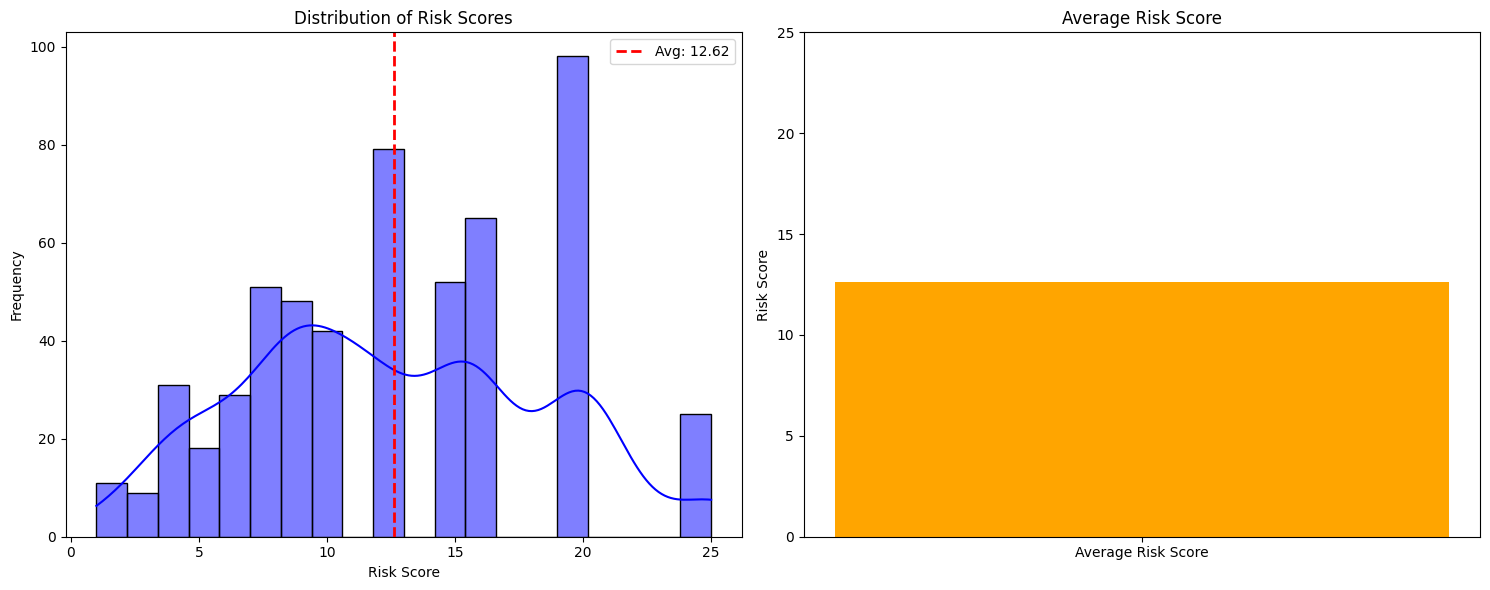

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import load_data_from_db

# Load relevant tables
risk_df = load_data_from_db("Risk")

# Ensure the column exists and contains valid numerical values
if "riskScore" in risk_df.columns:
    # Convert to numeric, forcing errors to NaN for non-convertible values
    risk_df["riskScore"] = pd.to_numeric(risk_df["riskScore"], errors='coerce')
    
    # Drop NaN values to avoid incorrect calculations
    risk_df = risk_df.dropna(subset=["riskScore"])
    
    # Handle potential outliers using the IQR method
    Q1 = risk_df["riskScore"].quantile(0.25)
    Q3 = risk_df["riskScore"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    risk_df = risk_df[(risk_df["riskScore"] >= lower_bound) & (risk_df["riskScore"] <= upper_bound)]
    
    # Calculate average risk score
    average_risk_score = risk_df["riskScore"].mean()
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the distribution of risk scores
    sns.histplot(risk_df["riskScore"], bins=20, kde=True, color='blue', ax=axes[0])
    axes[0].axvline(average_risk_score, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {average_risk_score:.2f}')
    axes[0].set_xlabel("Risk Score")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Distribution of Risk Scores")
    axes[0].legend()
    
    # Plot a bar chart showing the average risk score
    axes[1].bar("Average Risk Score", average_risk_score, color='orange')
    axes[1].set_ylim(0, max(risk_df["riskScore"]))
    axes[1].set_ylabel("Risk Score")
    axes[1].set_title("Average Risk Score")
    
    # Show the plots
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'riskScore' column not found in the Risk table.")


/tmp/ipykernel_5780/2536967503.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="name", y="riskScore", data=org_avg_risk_score, palette="viridis", ax=axes[1])
/tmp/ipykernel_5780/2536967503.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")


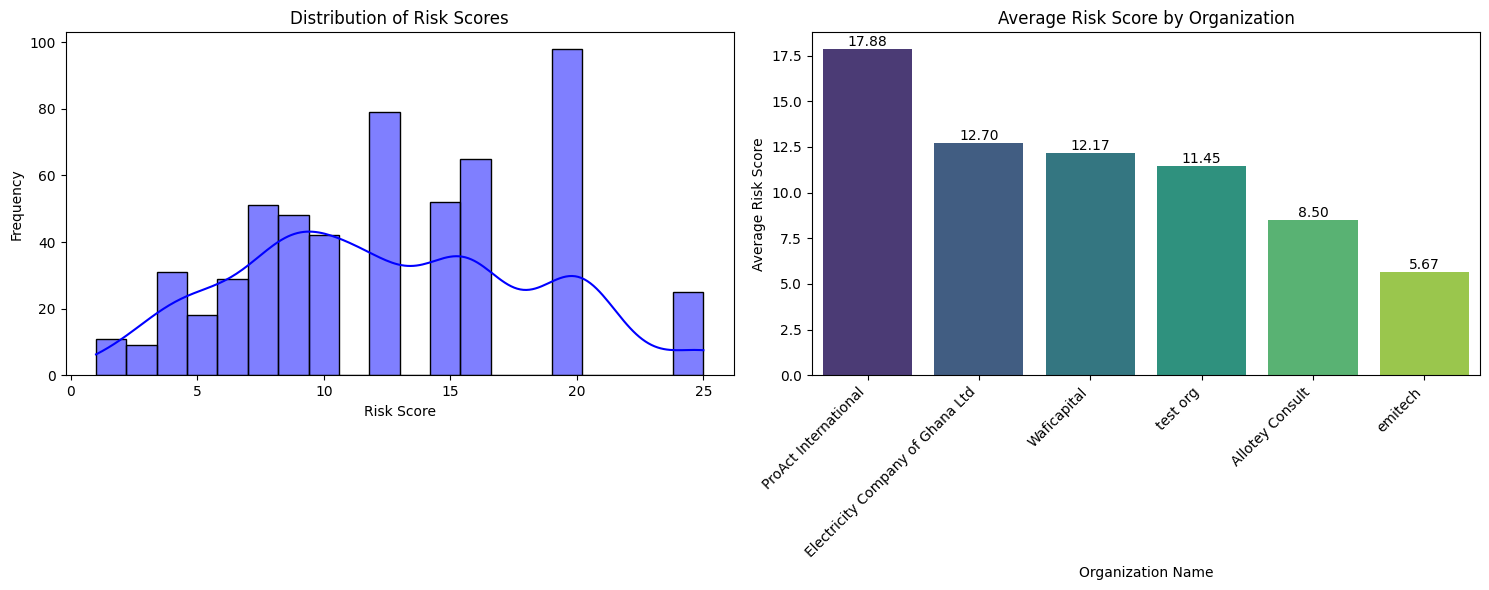

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import load_data_from_db

# Load relevant tables
risk_df = load_data_from_db("Risk")
department_df = load_data_from_db("Department")
organization_df = load_data_from_db("Organization")

# Ensure necessary columns exist and contain valid numerical values
if "riskScore" in risk_df.columns and "departmentId" in risk_df.columns and "id" in department_df.columns:
    # Convert to numeric, forcing errors to NaN for non-convertible values
    risk_df["riskScore"] = pd.to_numeric(risk_df["riskScore"], errors='coerce')
    
    # Drop NaN values to avoid incorrect calculations
    risk_df = risk_df.dropna(subset=["riskScore", "departmentId"])
    
    # Handle potential outliers using the IQR method
    Q1 = risk_df["riskScore"].quantile(0.25)
    Q3 = risk_df["riskScore"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    risk_df = risk_df[(risk_df["riskScore"] >= lower_bound) & (risk_df["riskScore"] <= upper_bound)]
    
    # Merge with Department table to get organizationId
    risk_df = risk_df.merge(department_df[['id', 'organizationId']], left_on='departmentId', right_on='id', suffixes=('', '_dept'))
    
    # Merge with Organization table to get organization name
    risk_df = risk_df.merge(organization_df[['id', 'name']], left_on='organizationId', right_on='id', suffixes=('', '_org'))
    
    # Calculate average risk score per organization
    org_avg_risk_score = risk_df.groupby(["organizationId", "name"])["riskScore"].mean().reset_index()
    
    # Sort organizations for better visualization
    org_avg_risk_score = org_avg_risk_score.sort_values(by="riskScore", ascending=False)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the distribution of risk scores
    sns.histplot(risk_df["riskScore"], bins=20, kde=True, color='blue', ax=axes[0])
    axes[0].set_xlabel("Risk Score")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Distribution of Risk Scores")
    
    # Plot a bar chart showing the average risk score per organization
    barplot = sns.barplot(x="name", y="riskScore", data=org_avg_risk_score, palette="viridis", ax=axes[1])
    axes[1].set_xlabel("Organization Name")
    axes[1].set_ylabel("Average Risk Score")
    axes[1].set_title("Average Risk Score by Organization")
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
    
    # Add values on top of each bar
    for p in barplot.patches:
        barplot.annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10, color='black')
    
    # Show the plots
    plt.tight_layout()
    plt.show()
else:
    print("Error: Required columns 'riskScore' or 'departmentId' not found in the Risk table, or 'organizationId' not found in the Department table.")


/tmp/ipykernel_28936/2852235967.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  total_risk_plot = sns.barplot(x="year", y="total_risk_score", data=yearly_metrics, palette=[colors[0]], ax=axes[0, 0], width=bar_width)
/tmp/ipykernel_28936/2852235967.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_risk_plot = sns.barplot(x="year", y="total_risk_count", data=yearly_metrics, palette=[colors[1]], ax=axes[0, 1], width=bar_width)


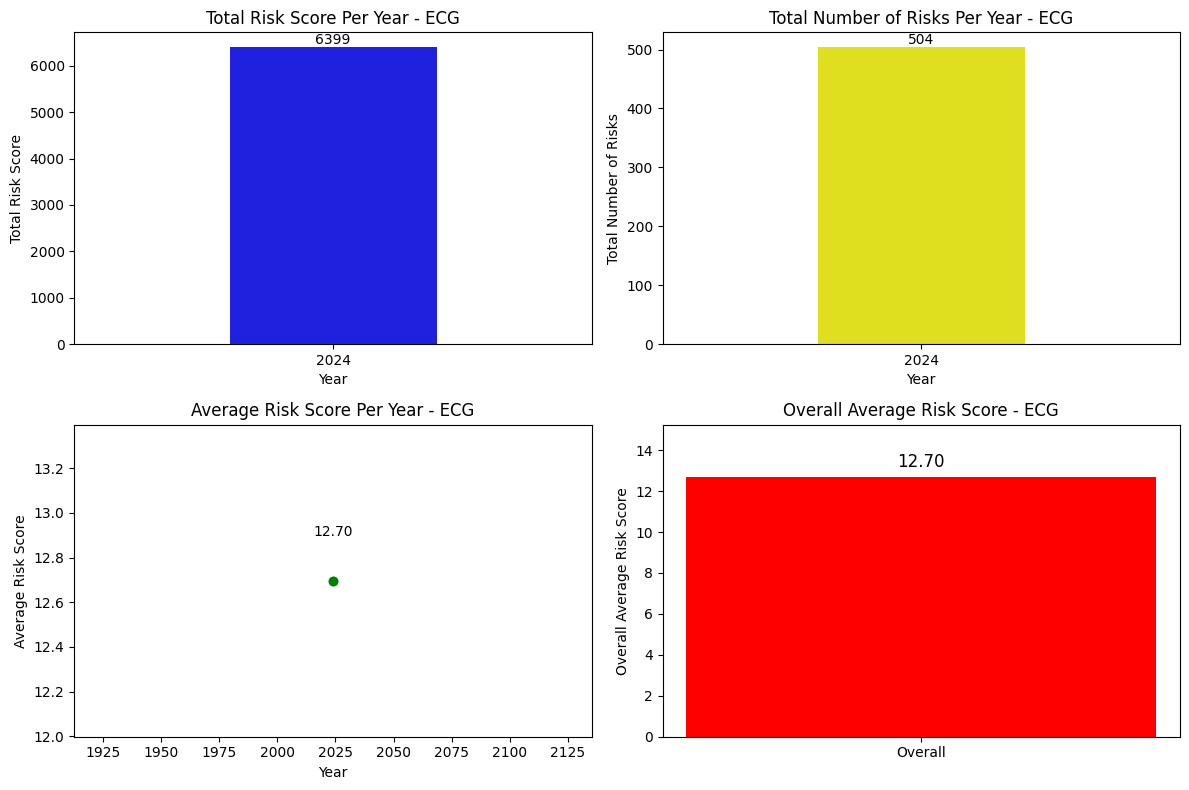

Overall Total Risk Score: 6399
Overall Total Number of Risks: 504
Overall Average Risk Score: 12.70


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import load_data_from_db

# Load relevant tables
risk_df = load_data_from_db("Risk")
department_df = load_data_from_db("Department")
organization_df = load_data_from_db("Organization")

# Ensure necessary columns exist and contain valid numerical values
if "riskScore" in risk_df.columns and "createdAt" in risk_df.columns and "departmentId" in risk_df.columns and "id" in department_df.columns:
    # Convert to numeric, forcing errors to NaN for non-convertible values
    risk_df["riskScore"] = pd.to_numeric(risk_df["riskScore"], errors='coerce')
    
    # Convert date column to datetime format to handle different date formats
    risk_df["createdAt"] = pd.to_datetime(risk_df["createdAt"], errors='coerce')
    
    # Drop NaN values to ensure accurate calculations
    risk_df = risk_df.dropna(subset=["riskScore", "createdAt", "departmentId"])
    
    # Extract year from the createdAt column
    risk_df["year"] = risk_df["createdAt"].dt.year
    
    # Merge with Department table to get organizationId
    risk_df = risk_df.merge(department_df[['id', 'organizationId']], left_on='departmentId', right_on='id', suffixes=('', '_dept'))
    
    # Merge with Organization table to get organization name
    risk_df = risk_df.merge(organization_df[['id', 'name']], left_on='organizationId', right_on='id', suffixes=('', '_org'))
    
    # Filter for only 'Electricity Company of Ghana Ltd'
    ecg_risk_df = risk_df[risk_df["name"] == "Electricity Company of Ghana Ltd"]
    
    # Filter data to start from 2023
    ecg_risk_df = ecg_risk_df[ecg_risk_df["year"] >= 2023]
    
    # Calculate required metrics per year
    yearly_metrics = ecg_risk_df.groupby("year").agg(
        total_risk_score=("riskScore", "sum"),
        total_risk_count=("riskScore", "count"),
        avg_risk_score=("riskScore", "mean")
    ).reset_index()
    
    # Calculate overall metrics
    overall_total_risk_score = ecg_risk_df["riskScore"].sum()
    overall_total_risk_count = ecg_risk_df.shape[0]
    overall_avg_risk_score = ecg_risk_df["riskScore"].mean()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Define color palettes
    colors = ["blue", "yellow", "green", "red"]
    
    # Adjust bar width
    bar_width = 0.5
    
    # Bar plot for total risk scores per year
    total_risk_plot = sns.barplot(x="year", y="total_risk_score", data=yearly_metrics, palette=[colors[0]], ax=axes[0, 0], width=bar_width)
    axes[0, 0].set_xlabel("Year")
    axes[0, 0].set_ylabel("Total Risk Score")
    axes[0, 0].set_title("Total Risk Score Per Year - ECG")
    
    # Add values on top of each bar
    for p in total_risk_plot.patches:
        total_risk_plot.annotate(f'{p.get_height():.0f}', 
                                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                                 ha='center', va='bottom', fontsize=10, color='black')
    
    # Bar plot for total risk count per year
    count_risk_plot = sns.barplot(x="year", y="total_risk_count", data=yearly_metrics, palette=[colors[1]], ax=axes[0, 1], width=bar_width)
    axes[0, 1].set_xlabel("Year")
    axes[0, 1].set_ylabel("Total Number of Risks")
    axes[0, 1].set_title("Total Number of Risks Per Year - ECG")
    
    # Add values on top of each bar
    for p in count_risk_plot.patches:
        count_risk_plot.annotate(f'{p.get_height():.0f}', 
                                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                                 ha='center', va='bottom', fontsize=10, color='black')
    
    # Line plot for average risk score per year with larger markers
    avg_risk_plot = sns.lineplot(x="year", y="avg_risk_score", data=yearly_metrics, marker='o', markersize=10, linestyle='-', color=colors[2], ax=axes[1, 0])
    axes[1, 0].set_xlabel("Year")
    axes[1, 0].set_ylabel("Average Risk Score")
    axes[1, 0].set_title("Average Risk Score Per Year - ECG")
    
    # Annotate each point
    for x, y in zip(yearly_metrics["year"], yearly_metrics["avg_risk_score"]):
        axes[1, 0].text(x, y + 0.2, f'{y:.2f}', ha='center', fontsize=10, color='black')
    
    # Bar plot for overall average risk score
    axes[1, 1].bar("Overall", overall_avg_risk_score, color=colors[3], width=bar_width)
    axes[1, 1].set_ylim(0, max(yearly_metrics["avg_risk_score"]) * 1.2)
    axes[1, 1].set_ylabel("Overall Average Risk Score")
    axes[1, 1].set_title("Overall Average Risk Score - ECG")
    axes[1, 1].text(0, overall_avg_risk_score + 0.5, f'{overall_avg_risk_score:.2f}', ha='center', fontsize=12, color='black')
    
    # Show the plots
    plt.tight_layout()
    plt.show()
    
    # Print summary results
    print(f"Overall Total Risk Score: {overall_total_risk_score}")
    print(f"Overall Total Number of Risks: {overall_total_risk_count}")
    print(f"Overall Average Risk Score: {overall_avg_risk_score:.2f}")
else:
    print("Error: Required columns 'riskScore', 'createdAt', or 'departmentId' not found in the Risk table, or 'organizationId' not found in the Department table.")
